In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_import = pd.read_csv("2018-2010_import.csv")
df_export = pd.read_csv("2018-2010_export.csv")

In [32]:
df_import.head(20)


,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018
5,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",8.32,AFGHANISTAN TIS,2018
6,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",108.78,AFGHANISTAN TIS,2018
7,20,"PREPARATIONS OF VEGETABLES, FRUIT, NUTS OR OTH...",0.65,AFGHANISTAN TIS,2018
8,25,SALT; SULPHUR; EARTHS AND STONE; PLASTERING MA...,0.05,AFGHANISTAN TIS,2018
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.00,AFGHANISTAN TIS,2018


In [33]:
df_export.head()


,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [34]:
df_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     137023 non-null  int64  
 1   Commodity  137023 non-null  object 
 2   value      122985 non-null  float64
 3   country    137023 non-null  object 
 4   year       137023 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [35]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76124 entries, 0 to 76123
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HSCode     76124 non-null  int64  
 1   Commodity  76124 non-null  object 
 2   value      64536 non-null  float64
 3   country    76124 non-null  object 
 4   year       76124 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.9+ MB


## Number of countries India is importing from & exporting to.

In [36]:
print("Imports: " + str(len(df_import['country'].unique())))
print("Exports: " + str(len(df_export['country'].unique())))

Imports: 242
Exports: 248


In [37]:
importing = list(df_import['country'].unique())
exporting = list(df_export['country'].unique())

In [38]:
df_imex = pd.DataFrame({"Import" : importing[:200] , "Export": exporting[:200]})

In [39]:
df_imex.head()

,Import,Export
0,AFGHANISTAN TIS,AFGHANISTAN TIS
1,ALBANIA,ALBANIA
2,ALGERIA,ALGERIA
3,AMERI SAMOA,AMERI SAMOA
4,ANDORRA,ANDORRA


In [40]:
countries = df_import.groupby("country")

In [44]:
total = []
for i in importing:
    total.append(df_import.loc[df_import['country'] == i , 'value' ].sum())

In [45]:
df_timports = pd.DataFrame({'Country': importing,'values': total})

In [46]:
df_timports

,Country,values
0,AFGHANISTAN TIS,2686.62
1,ALBANIA,524.18
2,ALGERIA,10185.73
3,AMERI SAMOA,5.82
4,ANDORRA,5.45
...,...,...
237,ST PIERRE,0.03
238,UNION OF SERBIA & MONTENEGRO,42.36
239,MICRONESIA,0.10
240,PACIFIC IS,0.01


In [65]:
df_timports = df_timports.sort_values(['values'],ascending = False).head()

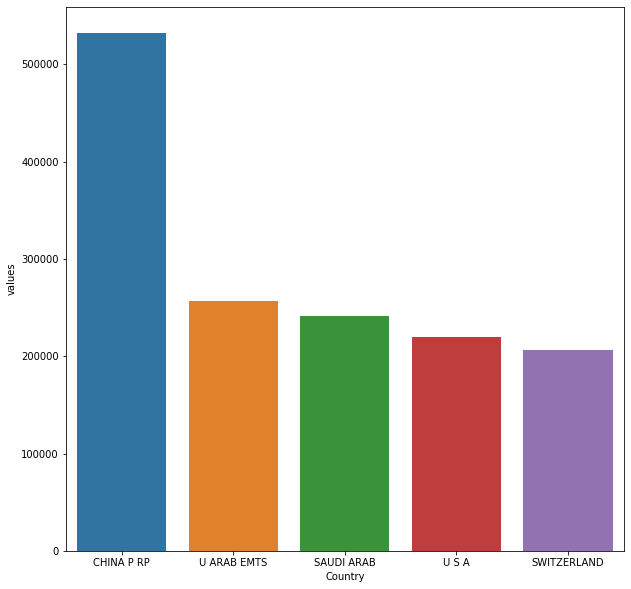

In [66]:
plt.figure(figsize = (10,10))
sns.barplot(data = df_timports , x = "Country" , y = "values" )
plt.xlabel = ("Total imports in Billions $")
plt.ylabel = ("Contries")
plt.title = ("Top 5 Country imports in India")

